# Api Spotify 

In [ ]:
# instalando biblioteca
%pip install spotipy


In [2]:
# importando as bibliotecas nescessarias
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials # type: ignore
import os

# Configuração das credenciais
os.environ['SPOTIPY_CLIENT_ID'] = '1b14869f7e864569a8f56f7e6f92882d'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'c172c91b50ea4266939e5d55505b5a61'

# Autenticação
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
print('Autenticado com sucesso!')


Autenticado com sucesso!


In [3]:
# Buscando Informaçao do Artisitas
results = sp.search(q='Bruno Mars', type='artist')
artist = results['artists']['items'][0]
print(f"Nome: {artist['name']}")
print(f"Popularidade: {artist['popularity']}")
print(f"Gêneros: {', '.join(artist['genres'])}")


Nome: Bruno Mars
Popularidade: 94
Gêneros: dance pop, pop


In [4]:
# Obtendo os álbuns e as faixas mais populares
artist_id = artist['id']
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(f"Música: {track['name']}, Popularidade: {track['popularity']}")


Música: Die With A Smile, Popularidade: 100
Música: When I Was Your Man, Popularidade: 87
Música: Locked out of Heaven, Popularidade: 87
Música: Just the Way You Are, Popularidade: 80
Música: That's What I Like, Popularidade: 86
Música: It Will Rain, Popularidade: 83
Música: Talking to the Moon, Popularidade: 75
Música: Grenade, Popularidade: 79
Música: Treasure, Popularidade: 82
Música: 24K Magic, Popularidade: 81


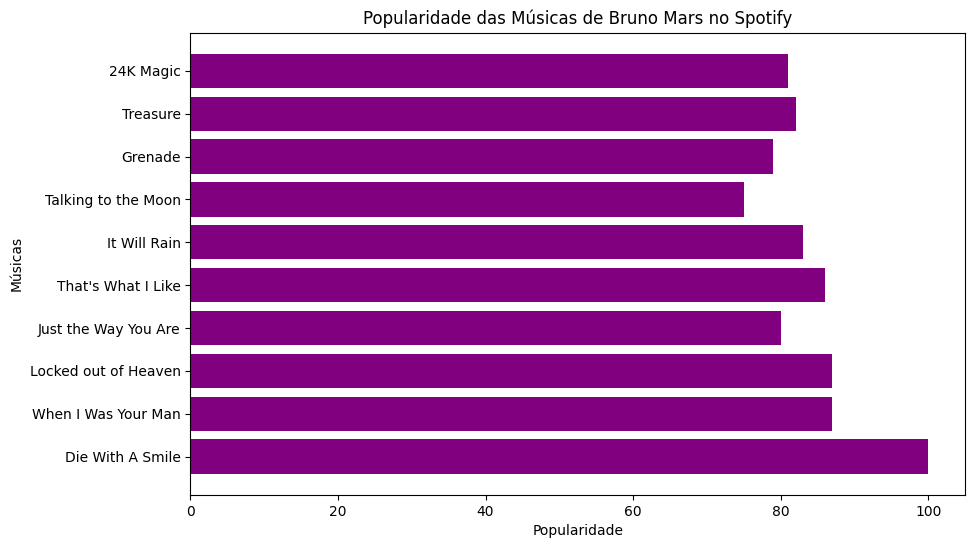

In [5]:
import matplotlib.pyplot as plt # type: ignore

# Gerando Gráfico das músicas populares 
track_names = [track['name'] for track in top_tracks['tracks']]
track_popularity = [track['popularity'] for track in top_tracks['tracks']]

plt.figure(figsize=(10,6))
plt.barh(track_names, track_popularity, color='purple')
plt.xlabel('Popularidade')
plt.ylabel('Músicas')
plt.title('Popularidade das Músicas de Bruno Mars no Spotify')
plt.show()


# Analisando as Características de Áudio

In [8]:
import pandas as pd
# Coletando as características de uma música
track_id = '0puf9yIluy9W0vpMEUoAnN'  # ID da música
track_features = sp.audio_features(track_id)

# Exibindo as características
track_features_df = pd.DataFrame(track_features)
track_features_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.706,0.786,0,-3.417,0,0.091,0.26,0,0.38,0.751,150.028,audio_features,0puf9yIluy9W0vpMEUoAnN,spotify:track:0puf9yIluy9W0vpMEUoAnN,https://api.spotify.com/v1/tracks/0puf9yIluy9W...,https://api.spotify.com/v1/audio-analysis/0puf...,199387,4


<Axes: title={'center': 'Características da Música'}>

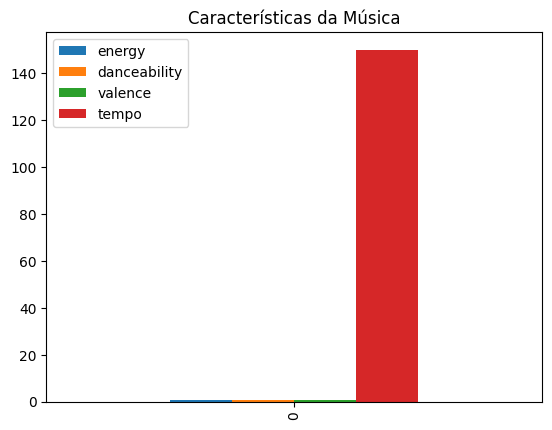

In [9]:
# Descrição das características
features = ['energy', 'danceability', 'valence', 'tempo']
track_features_df[features].plot(kind='bar', title="Características da Música")


In [10]:
# Coletando as características de várias músicas
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'  # Playlist 'Today's Top 50 Mundo'
results = sp.playlist_tracks(playlist_id)

# Coletando o ID das músicas
track_ids = [track['track']['id'] for track in results['items']]

# Coletando as características de todas as músicas
tracks_features = sp.audio_features(track_ids)
tracks_df = pd.DataFrame(tracks_features)
tracks_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.0000,0.122,0.535,157.969,audio_features,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,https://api.spotify.com/v1/audio-analysis/2plb...,251668,3
1,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.0608,0.117,0.438,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4
2,0.777,0.783,0,-4.477,0,0.2600,0.02830,0.0000,0.355,0.939,149.027,audio_features,5vNRhkKd0yEAg8suGBpjeY,spotify:track:5vNRhkKd0yEAg8suGBpjeY,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,https://api.spotify.com/v1/audio-analysis/5vNR...,169917,4
3,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.0000,0.193,0.838,116.034,audio_features,7tI8dRuH2Yc6RuoTjxo4dU,spotify:track:7tI8dRuH2Yc6RuoTjxo4dU,https://api.spotify.com/v1/tracks/7tI8dRuH2Yc6...,https://api.spotify.com/v1/audio-analysis/7tI8...,170888,4
4,0.674,0.907,3,-4.086,1,0.0640,0.10100,0.0000,0.297,0.721,112.964,audio_features,5G2f63n7IPVPPjfNIGih7Q,spotify:track:5G2f63n7IPVPPjfNIGih7Q,https://api.spotify.com/v1/tracks/5G2f63n7IPVP...,https://api.spotify.com/v1/audio-analysis/5G2f...,157280,4


<Axes: title={'center': 'Variação da Energia nas Músicas'}>

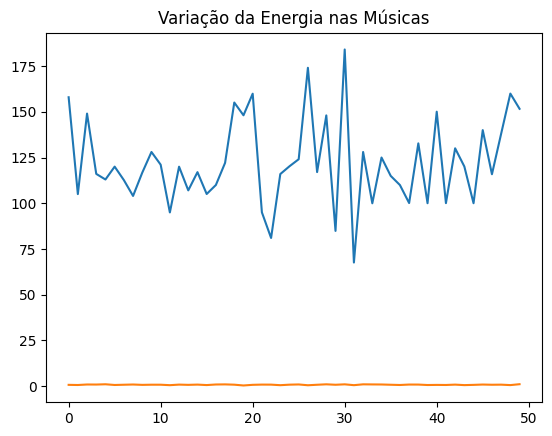

In [11]:
# Analisando tendências
tracks_df['tempo'].plot(kind='line', title='Variação do Tempo nas Músicas')
tracks_df['energy'].plot(kind='line', title='Variação da Energia nas Músicas')


# Analisando Popularidade e Rankings de Músicas no Spotify 

Coletando as músicas mais populares

In [15]:
# Importando Bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Coletando as músicas da playlist Top 50 Global
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'  # ID do 'Top 50 Global'
results = sp.playlist_tracks(playlist_id)

# Coletando IDs e características das músicas
tracks = []
for item in results['items']:
    track = item['track']
    tracks.append({
        'name': track['name'],
        'artist': track['artists'][0]['name'],
        'popularity': track['popularity'],
        'id': track['id']
    })

# Convertendo para DataFrame
tracks_df = pd.DataFrame(tracks)
tracks_df.head()


,name,artist,popularity,id
0,Die With A Smile,Lady Gaga,100,2plbrEY59IikOBgBGLjaoe
1,BIRDS OF A FEATHER,Billie Eilish,98,6dOtVTDdiauQNBQEDOtlAB
2,APT.,ROSÉ,0,5vNRhkKd0yEAg8suGBpjeY
3,Who,Jimin,92,7tI8dRuH2Yc6RuoTjxo4dU
4,Taste,Sabrina Carpenter,95,5G2f63n7IPVPPjfNIGih7Q


 Criando gráficos de popularidade

C:\Users\sara1\AppData\Local\Temp\ipykernel_18264\1764992432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=tracks_df.sort_values('popularity', ascending=False), palette='viridis')


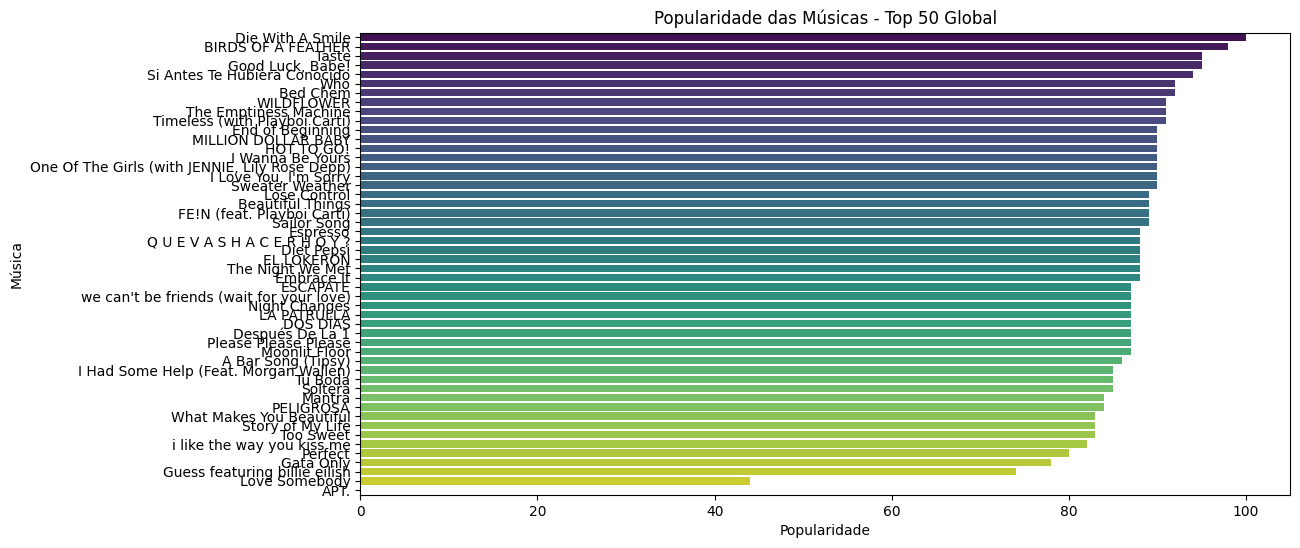

In [16]:
# Visualizando a popularidade das músicas
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='name', data=tracks_df.sort_values('popularity', ascending=False), palette='viridis')
plt.title('Popularidade das Músicas - Top 50 Global')
plt.xlabel('Popularidade')
plt.ylabel('Música')
plt.show()


Comparando popularidade com outras características

In [ ]:
# Coletando características das músicas
track_ids = tracks_df['id'].tolist()
track_features = sp.audio_features(track_ids)

# Convertendo para DataFrame
features_df = pd.DataFrame(track_features)

# Combinando as características com o DataFrame de popularidade
combined_df = tracks_df.merge(features_df, left_on='id', right_on='id')

# Visualizando a relação entre popularidade e energia
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='popularity', data=combined_df, hue='artist', palette='coolwarm')
plt.title('Relação entre Popularidade e Energia')
plt.xlabel('Energia')
plt.ylabel('Popularidade')
plt.show()


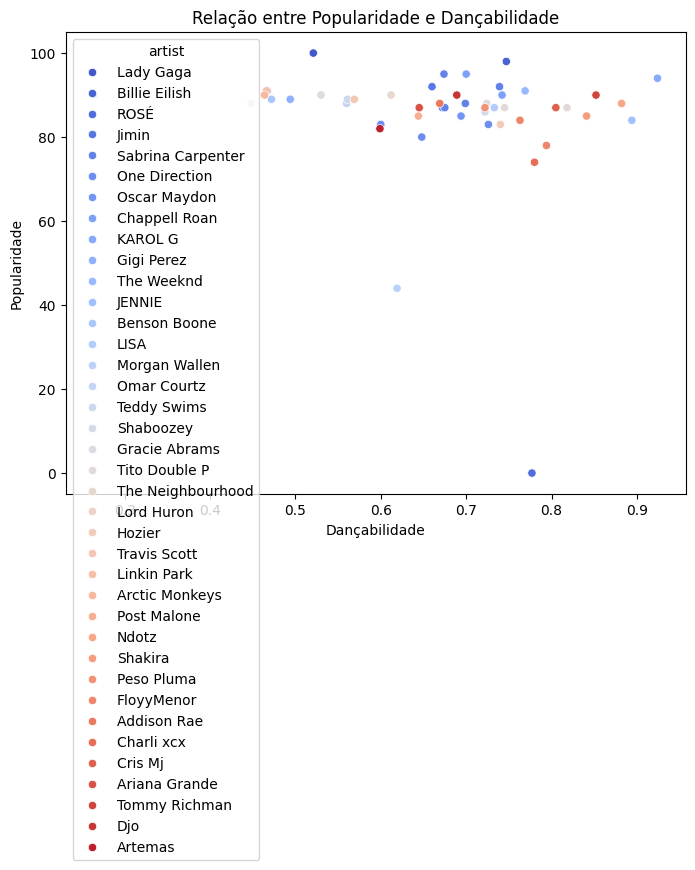

In [19]:
# Coletando características das músicas
track_ids = tracks_df['id'].tolist()
track_features = sp.audio_features(track_ids)

# Convertendo para DataFrame
features_df = pd.DataFrame(track_features)

# Combinando as características com o DataFrame de popularidade
combined_df = tracks_df.merge(features_df, left_on='id', right_on='id')

# Visualizando a relação entre popularidade e energia
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=combined_df, hue='artist', palette='coolwarm')
plt.title('Relação entre Popularidade e Dançabilidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')
plt.show()


# Bonus

Relembrando a Coleta de Características

In [ ]:
# Já coletamos popularidade e características principais (energia, dançabilidade)
# Vamos incluir mais métricas: valência (quão positiva a música soa) e acústica

# Coletando mais características
track_ids = tracks_df['id'].tolist()
track_features = sp.audio_features(track_ids)
features_df = pd.DataFrame(track_features)

# Selecionando características principais
selected_features = features_df[['danceability', 'energy', 'valence', 'acousticness', 'popularity']]

# Combinando com a popularidade
combined_df = tracks_df[['name', 'artist', 'popularity']].merge(features_df, left_on='id', right_on='id')
combined_df.head()


Comparando Popularidade com Dançabilidade e Energia

In [ ]:
# Visualizando a relação entre popularidade, dançabilidade e energia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=combined_df, hue='energy', palette='coolwarm')
plt.title('Popularidade vs Dançabilidade com Energia')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')
plt.colorbar(label='Energia')
plt.show()


Analisando a Valência (Emoção da Música)

In [ ]:
# Comparando popularidade e valência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='popularity', data=combined_df, hue='acousticness', palette='Spectral')
plt.title('Popularidade vs Valência com Acústica')
plt.xlabel('Valência')
plt.ylabel('Popularidade')
plt.colorbar(label='Acústica')
plt.show()


Identificando Outliers

In [ ]:
# Identificando músicas com popularidade acima de 80, mas com baixa dançabilidade
outliers = combined_df[(combined_df['popularity'] > 80) & (combined_df['danceability'] < 0.5)]
print(outliers[['name', 'artist', 'popularity', 'danceability']])

# Visualizando os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=combined_df, hue='valence', palette='coolwarm')
plt.title('Outliers: Músicas Populares com Baixa Dançabilidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')
plt.show()


Analisando Correlações

In [ ]:
# Criando a matriz de correlação
correlation_matrix = combined_df[['danceability', 'energy', 'valence', 'acousticness', 'popularity']].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlação: Popularidade e Características')
plt.show()

 Explorando Gêneros e Popularidade

In [ ]:
# Coletando gêneros dos artistas
genres = []
for artist in tracks_df['artist']:
    artist_info = sp.search(q=artist, type='artist')
    genre = artist_info['artists']['items'][0]['genres']
    genres.append(genre if genre else ['Unknown'])

# Adicionando os gêneros ao DataFrame
tracks_df['genres'] = genres

# Separando os gêneros (alguns artistas têm mais de um)
tracks_df = tracks_df.explode('genres')

# Visualizando a popularidade por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='popularity', data=tracks_df)
plt.title('Popularidade por Gênero Musical')
plt.xticks(rotation=90)
plt.show()


#  Criando Análises Pessoais com o Spotify API

In [ ]:
# Conectando à API do Spotify e coletando dados de uma playlist
playlist_id = 'INSIRA_O_ID_DA_PLAYLIST_AQUI'
playlist_tracks = sp.playlist_tracks(playlist_id)

# Extraindo informações das músicas
track_names = []
track_ids = []
for track in playlist_tracks['items']:
    track_names.append(track['track']['name'])
    track_ids.append(track['track']['id'])

# Visualizando as músicas da playlist
for name in track_names:
    print(name)

Explorando Características das Músicas

In [ ]:
# Coletando características das músicas
track_features = sp.audio_features(track_ids)
features_df = pd.DataFrame(track_features)

# Exibindo as primeiras linhas
features_df[['danceability', 'energy', 'valence', 'acousticness', 'popularity']].head()


Fazendo Suas Próprias Comparações

In [ ]:
# Criando um gráfico de dispersão para popularidade vs energia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=features_df, hue='danceability', palette='coolwarm')
plt.title('Popularidade vs Energia')
plt.xlabel('Energia')
plt.ylabel('Popularidade')
plt.show()


Explorando Gêneros

In [ ]:
# Coletando gêneros dos artistas
genres = []
for artist in tracks_df['artist']:
    artist_info = sp.search(q=artist, type='artist')
    genre = artist_info['artists']['items'][0]['genres']
    genres.append(genre if genre else ['Unknown'])

# Adicionando os gêneros ao DataFrame
tracks_df['genres'] = genres

# Criando um gráfico de popularidade por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='popularity', data=tracks_df)
plt.title('Popularidade por Gênero Musical')
plt.xticks(rotation=90)
plt.show()
